# **PROYEK ANALISIS DATA : TIANTAN AIR POLUTION DATASET**

- NAMA : Jati Kurniawan Yusuf Saputra

- EMAIL : jatikurniawan1274@gmail.com


# **Mendefinisikan Pertanyaan Bisnis**







1.   Bagaimana trend polusi udara di kota Tantan?
2.   Pada rentang waktu apa tingkat partikel yang ada di udara di kota Tiantan cenderung tinggi?
3.   Bagaimana pengaruh tingkat polusi udara dengan perubahan suhu dan tekanan di Tiantan?

# **Melakukan import Modul & Packages**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Wragling**




### Gathering Data

Proses gathering dimulai dengan membuat data tiantan_dataframe yang berisi air polution dataset kota Tiantan

In [113]:
tiantan_dataframe = pd.read_csv("/content/drive/MyDrive/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_dataframe

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


### Assesing Data

Assessing data dimulai dengan mencari informasi mengenai data berupa tiap tipe data masing-masing variabel.

In [114]:
tiantan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dilanjutkan dengan mencari informasi missing value pada setiap kolom dalam dataset

In [115]:
tiantan_dataframe.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


Dilanjutkan dengan mencari informasi data yang duplikat dalam dataset

In [116]:
print(f'Jumlah data duplikat : {tiantan_dataframe.duplicated().sum()}')

Jumlah data duplikat : 0


Dilanjutkan dengan melihat data statistik setiap parameter dalam dataset

In [117]:
tiantan_dataframe.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

Cleaning data dimulai dengan menghapus kolom station karena kolom station berisi data yang sama yang menjelaskan bahwa data diambil di kota Tiantan

In [118]:
tiantan_dataframe = tiantan_dataframe.drop(columns={"station"})
tiantan_dataframe

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2


Untuk mengisi missing value pada dataset, dilakukan pengisian berdasarkan data pada baris sebelumnya dengan asumsi karakteristik data tidak mudah berganti secara drastis dalam kurun waktu yang singkat

In [119]:
tiantan_dataframe.fillna(method="ffill", inplace=True)
tiantan_dataframe

<ipython-input-119-5b37efd11d47>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tiantan_dataframe.fillna(method="ffill", inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2


Pengecekan hasil imputasi missing value

In [120]:
tiantan_dataframe.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


# **Exploratory Data Analysis**

### Agregasi data polusi berdasarkan masing masing kategori waktu

Mengelompokkan data berdasarkan jam pengumpulan data

In [121]:
polution_groupby_hour = tiantan_dataframe.groupby(by=['year', 'month', 'day','hour']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'})\
    .sort_values(by=['year', 'month', 'day','hour'], ascending=True)
polution_groupby_hour = polution_groupby_hour.reset_index()
polution_groupby_hour['group'] = polution_groupby_hour['hour'].astype(str) + ':00'
polution_groupby_hour.head(24)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,group
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,0:00
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,1:00
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,2:00
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,3:00
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,4:00
5,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,5:00
6,2013,3,1,6,8.0,19.0,12.0,14.0,400.0,72.0,6:00
7,2013,3,1,7,7.0,7.0,12.0,19.0,400.0,67.0,7:00
8,2013,3,1,8,3.0,6.0,14.0,29.0,500.0,56.0,8:00
9,2013,3,1,9,8.0,2.0,11.0,22.0,500.0,65.0,9:00


Pengelompokkan data berdasarkan hari pengumpulan data

In [122]:
polution_groupby_day = tiantan_dataframe.groupby(by=['year', 'month','day']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'})\
    .sort_values(by=['year', 'month', 'day'], ascending=True)

polution_groupby_day = polution_groupby_day.reset_index()
polution_groupby_day['group'] = polution_groupby_day['day'].astype(str) + '-' + polution_groupby_day['month'].astype(str) + '-' + polution_groupby_day['year'].astype(str)
polution_groupby_day.head(31)

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,group
0,2013,3,1,8.625000,14.458333,8.875000,21.583333,450.000000,68.083333,1-3-2013
1,2013,3,2,31.708333,37.041667,26.458333,49.458333,912.500000,34.041667,2-3-2013
2,2013,3,3,98.041667,121.333333,55.625000,82.958333,2028.958333,16.916667,3-3-2013
3,2013,3,4,22.333333,37.583333,16.583333,42.041667,895.791667,53.125000,4-3-2013
4,2013,3,5,141.666667,156.375000,74.333333,101.666667,2408.000000,94.000000,5-3-2013
5,2013,3,6,193.708333,206.333333,95.166667,126.750000,3057.916667,75.333333,6-3-2013
6,2013,3,7,257.500000,278.291667,72.666667,134.083333,4416.291667,55.291667,7-3-2013
7,2013,3,8,202.041667,224.666667,49.009967,112.361013,3632.875000,102.458333,8-3-2013
8,2013,3,9,60.333333,222.916667,26.625000,41.625000,1387.291667,88.916667,9-3-2013
9,2013,3,10,38.291667,66.500000,20.666667,44.791667,812.416667,89.750000,10-3-2013


Pengelompokkan data berdasarkan bulan pengumpulan data

In [123]:
polution_groupby_month = tiantan_dataframe.groupby(by=['year', 'month']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'})\
    .sort_values(by=['year', 'month'], ascending=True)

polution_groupby_month = polution_groupby_month.reset_index()
polution_groupby_month['group'] = pd.to_datetime(polution_groupby_month['month'], format='%m').dt.month_name()
polution_groupby_month = polution_groupby_month.drop(columns='month')
polution_groupby_month

,year,PM2.5,PM10,SO2,NO2,CO,O3,group
0,2013,106.228495,123.461022,37.718063,64.045248,1558.427419,63.548901,March
1,2013,60.944444,90.766667,21.263254,43.594327,984.637500,76.540954,April
2,2013,80.490591,138.193548,26.998656,42.267473,1097.356183,81.729872,May
3,2013,110.538889,133.738889,15.279959,48.787583,1442.623611,74.805719,June
4,2013,69.305108,84.125000,6.993353,43.394548,1071.215054,77.739515,July
5,2013,64.237903,82.314516,6.286671,40.774799,923.521505,80.224788,August
6,2013,80.237500,105.884722,10.450387,57.727285,1323.598611,45.068429,September
7,2013,95.069892,118.759409,13.325233,65.641869,1293.145161,25.177067,October
8,2013,80.386111,103.420833,14.573611,57.394444,1531.527778,19.172930,November
9,2013,85.126344,102.494624,28.760184,68.105569,1945.295699,17.278343,December


Pengelompokkan data berdasarkan tahun pengumpulan data

In [124]:
polution_groupby_year = tiantan_dataframe.groupby('year').agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'})\
    .sort_values(by=['year'], ascending=True)

polution_groupby_year = polution_groupby_year.reset_index()
polution_groupby_year['group'] = polution_groupby_year['year'].astype(str)
polution_groupby_year = polution_groupby_year.drop(columns='year')
polution_groupby_year

,PM2.5,PM10,SO2,NO2,CO,O3,group
0,83.259532,108.314134,18.201187,53.190274,1317.089597,56.157824,2013
1,87.372740,115.426336,19.632374,56.047991,1342.602740,57.168174,2014
2,82.209977,102.769806,11.814292,52.013779,1303.470320,60.325148,2015
3,73.821380,97.284950,8.936020,49.959586,1195.992714,55.508424,2016
4,98.002119,125.997881,14.074153,64.002825,1776.553672,35.755650,2017


### Mencari rentang Waktu data polusi di kota Tiantan

Membagi kategori waktu menjadi:
-  "Night" untuk pukul 0 - 6
-  "Morning" untuk 6 - 12
-  "Afternoon" untuk 12 - 18
-  "Evening" untuk 18 - 23

In [125]:
tiantan_dataframe['time_category'] = tiantan_dataframe.hour.apply(
    lambda x: "Night" if x<6
    else "Morning" if x<12
    else "Afternoon" if x<18
    else "Evening"
)

tiantan_dataframe

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,time_category
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Night
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Night
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Night
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Night
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5,-16.2,0.0,NW,2.4,Evening
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Evening
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Evening
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Evening


Mengelompokkan data berdasarkan kategori waktu

In [126]:
time_category_group = tiantan_dataframe.groupby('time_category').agg({
    'hour' : 'first',
    'PM2.5' : 'mean',
    'PM10' : 'mean'})\
    .sort_values(by=['hour'], ascending=True)

time_category_group = time_category_group.reset_index()
time_category_group

,time_category,hour,PM2.5,PM10
0,Night,0,86.785832,107.555179
1,Morning,6,79.565743,101.906719
2,Afternoon,12,78.011408,102.097821
3,Evening,18,84.660586,115.068298


### Pengecekan Korelasi polusi dengan suhu dan tekanan

Membuat dataset yang baru untuk memisahkan korelasi

In [127]:
correlation_dataframe = tiantan_dataframe[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']].copy()
correlation_dataframe

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1
...,...,...,...,...,...,...,...,...
35059,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5
35060,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6
35061,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2
35062,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4


Melakukan penghitungan korelasi dengan metode Spearman

In [128]:
correlation = correlation_dataframe.corr(method='spearman')
correlation

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
PM2.5,1.000000,0.885623,0.425858,0.598143,0.842553,-0.265882,-0.034943,-0.087118
PM10,0.885623,1.000000,0.426083,0.556358,0.719383,-0.208029,-0.032793,-0.090929
SO2,0.425858,0.426083,1.000000,0.379897,0.450619,-0.010197,-0.264804,0.229058
NO2,0.598143,0.556358,0.379897,1.000000,0.712535,-0.663739,-0.326993,0.199900
CO,0.842553,0.719383,0.450619,0.712535,1.000000,-0.467093,-0.213284,0.078663
O3,-0.265882,-0.208029,-0.010197,-0.663739,-0.467093,1.000000,0.551154,-0.399817
TEMP,-0.034943,-0.032793,-0.264804,-0.326993,-0.213284,0.551154,1.000000,-0.841339
PRES,-0.087118,-0.090929,0.229058,0.199900,0.078663,-0.399817,-0.841339,1.000000


Membuat dataframe yang berisi nilai Korelasi polusi dan suhu

In [129]:
temp_PM25 = round(correlation_dataframe['PM2.5'].corr(correlation_dataframe['TEMP'], method='spearman'), 2)
temp_PM10 = round(correlation_dataframe['PM10'].corr(correlation_dataframe['TEMP'], method='spearman'), 2)
temp_SO2 = round(correlation_dataframe['SO2'].corr(correlation_dataframe['TEMP'], method='spearman'),2)
temp_NO2 = round(correlation_dataframe['NO2'].corr(correlation_dataframe['TEMP'], method='spearman'),2)
temp_CO = round(correlation_dataframe['CO'].corr(correlation_dataframe['TEMP'], method='spearman'),2)
temp_O3 = round(correlation_dataframe['O3'].corr(correlation_dataframe['TEMP'], method='spearman'),2)

temperature_correlation = pd.DataFrame({
    'PM2.5' : temp_PM25,
    'PM10' : temp_PM10,
    'SO2' : temp_SO2,
    'NO2' : temp_NO2,
    'CO' : temp_CO,
    'O3' : temp_O3
}, index=['Temperature'])

temperature_correlation

,PM2.5,PM10,SO2,NO2,CO,O3
Temperature,-0.03,-0.03,-0.26,-0.33,-0.21,0.55


Membuat dataframe yang berisi nilai Korelasi polusi dan tekanan

In [130]:
pres_PM25 = round(correlation_dataframe['PM2.5'].corr(correlation_dataframe['PRES'], method='spearman'), 2)
pres_PM10 = round(correlation_dataframe['PM10'].corr(correlation_dataframe['PRES'], method='spearman'), 2)
pres_SO2 = round(correlation_dataframe['SO2'].corr(correlation_dataframe['PRES'], method='spearman'),2)
pres_NO2 = round(correlation_dataframe['NO2'].corr(correlation_dataframe['PRES'], method='spearman'),2)
pres_CO = round(correlation_dataframe['CO'].corr(correlation_dataframe['PRES'], method='spearman'),2)
pres_O3 = round(correlation_dataframe['O3'].corr(correlation_dataframe['PRES'], method='spearman'),2)

pressure_correlation = pd.DataFrame({
    'PM2.5' : pres_PM25,
    'PM10' : pres_PM10,
    'SO2' : pres_SO2,
    'NO2' : pres_NO2,
    'CO' : pres_CO,
    'O3' : pres_O3
}, index=['Pressure'])

pressure_correlation

,PM2.5,PM10,SO2,NO2,CO,O3
Pressure,-0.09,-0.09,0.23,0.2,0.08,-0.4


# **Visualization & Explanatory Analysis**

Menentukan style

In [131]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

### Pertanyaan 1 : Trend Polusi kota Tiantan

Membuat line chart untuk menunjukkan data polusi

In [132]:
def show_polution_line_chart(df):
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

  ax[0,0].plot(df['group'], df['PM2.5'], marker='o', linewidth=2)
  ax[0,0].tick_params(axis='y', labelsize=20)
  ax[0,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[0,0].set_ylabel("PM2.5", fontsize=25)
  ax[0,0].set_title("PM2.5", loc="center", fontsize=35)

  ax[0,1].plot(df['group'], df['PM10'], marker='o', linewidth=2)
  ax[0,1].tick_params(axis='y', labelsize=20)
  ax[0,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[0,1].set_ylabel("PM10", fontsize=25)
  ax[0,1].set_title("PM10", loc="center", fontsize=35)

  ax[1,0].plot(df['group'], df['SO2'], marker='o', linewidth=2)
  ax[1,0].tick_params(axis='y', labelsize=20)
  ax[1,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[1,0].set_ylabel("SO2", fontsize=25)
  ax[1,0].set_title("SO2", loc="center", fontsize=35)

  ax[1,1].plot(df['group'], df['NO2'], marker='o', linewidth=2)
  ax[1,1].tick_params(axis='y', labelsize=20)
  ax[1,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[1,1].set_ylabel("NO2", fontsize=25)
  ax[1,1].set_title("NO2", loc="center", fontsize=35)


  ax[2,0].plot(df['group'], df['CO'], marker='o', linewidth=2)
  ax[2,0].tick_params(axis='y', labelsize=20)
  ax[2,0].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[2,0].set_ylabel("CO", fontsize=25)
  ax[2,0].set_title("CO", loc="center", fontsize=35)


  ax[2,1].plot(df['group'], df['O3'], marker='o', linewidth=2)
  ax[2,1].tick_params(axis='y', labelsize=20)
  ax[2,1].tick_params(axis='x', labelsize=20, labelrotation = 45)
  ax[2,1].set_ylabel("O3", fontsize=25)
  ax[2,1].set_title("O3", loc="center", fontsize=35)

  fig.tight_layout(pad=2.0)

  plt.suptitle("Trend Tingkat Polusi Udara di Tiantin", fontsize=45, y=1.05)
  plt.show()

Visualisasi data polusi berdasarkan jam

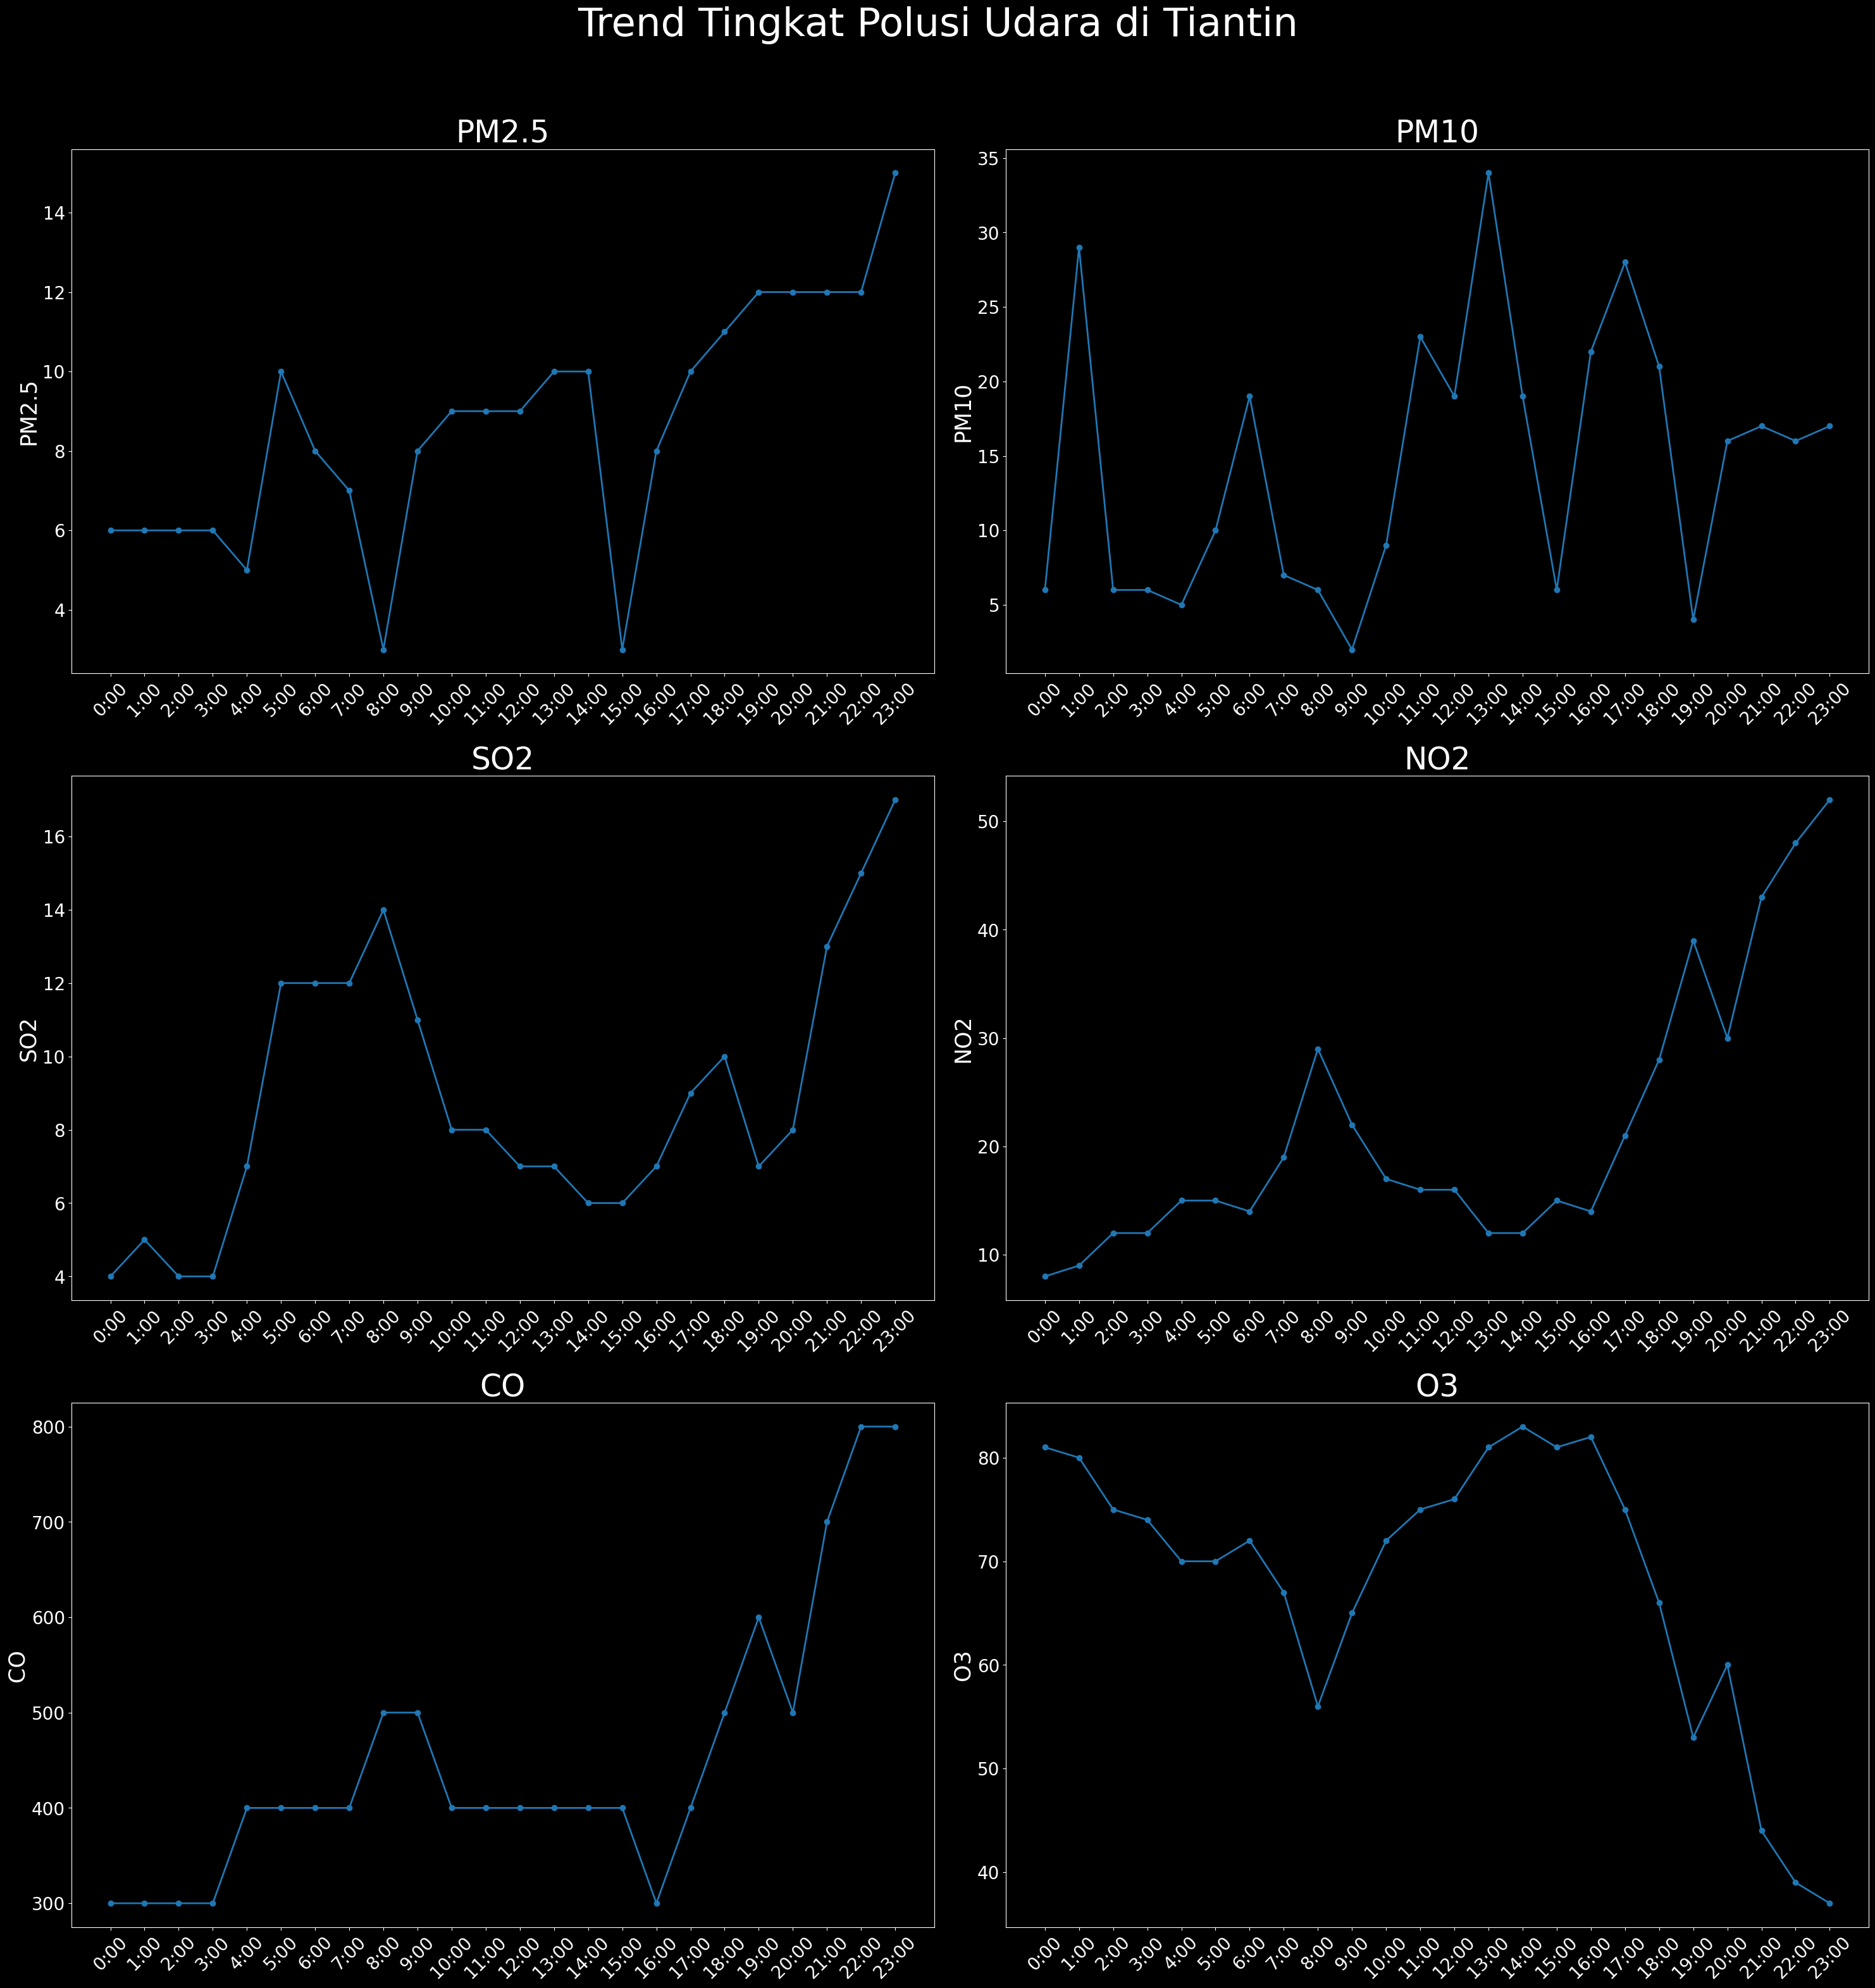

In [133]:
show_polution_line_chart(polution_groupby_hour.head(24))

Visualisasi data polusi berdasarkan hari

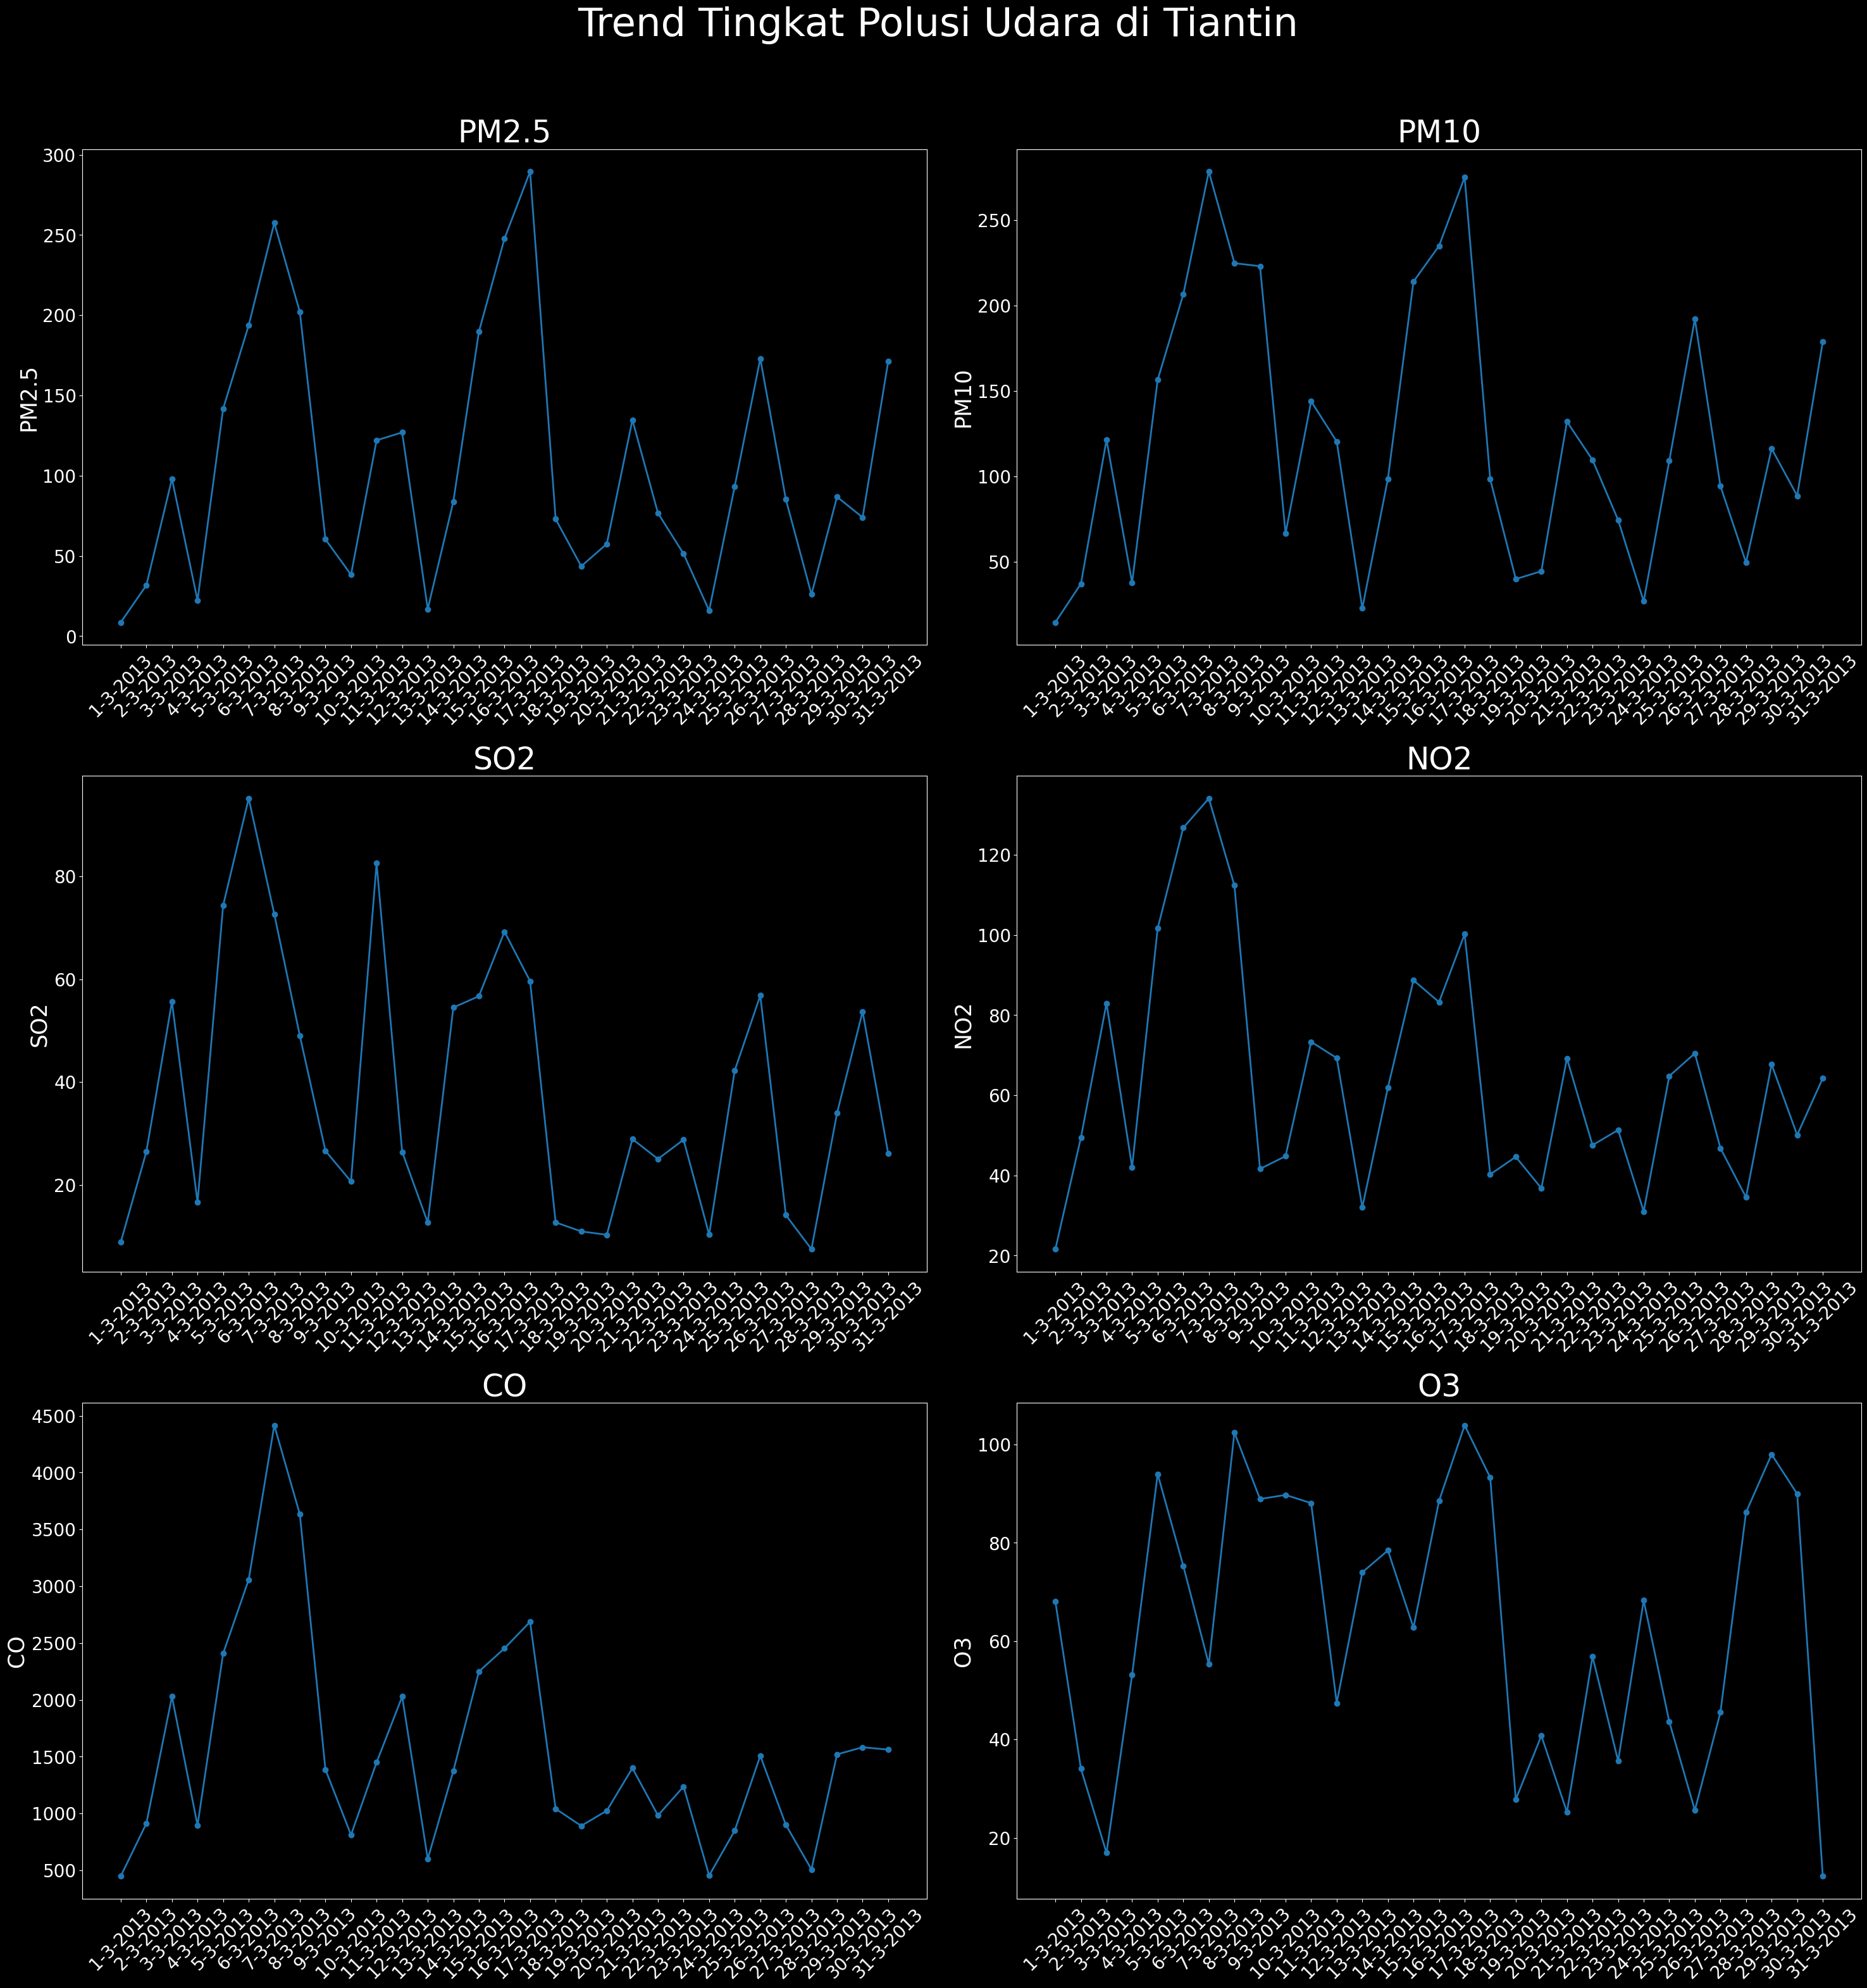

In [134]:
show_polution_line_chart(polution_groupby_day.head(31))

Visualisasi data berdasarkan bulan

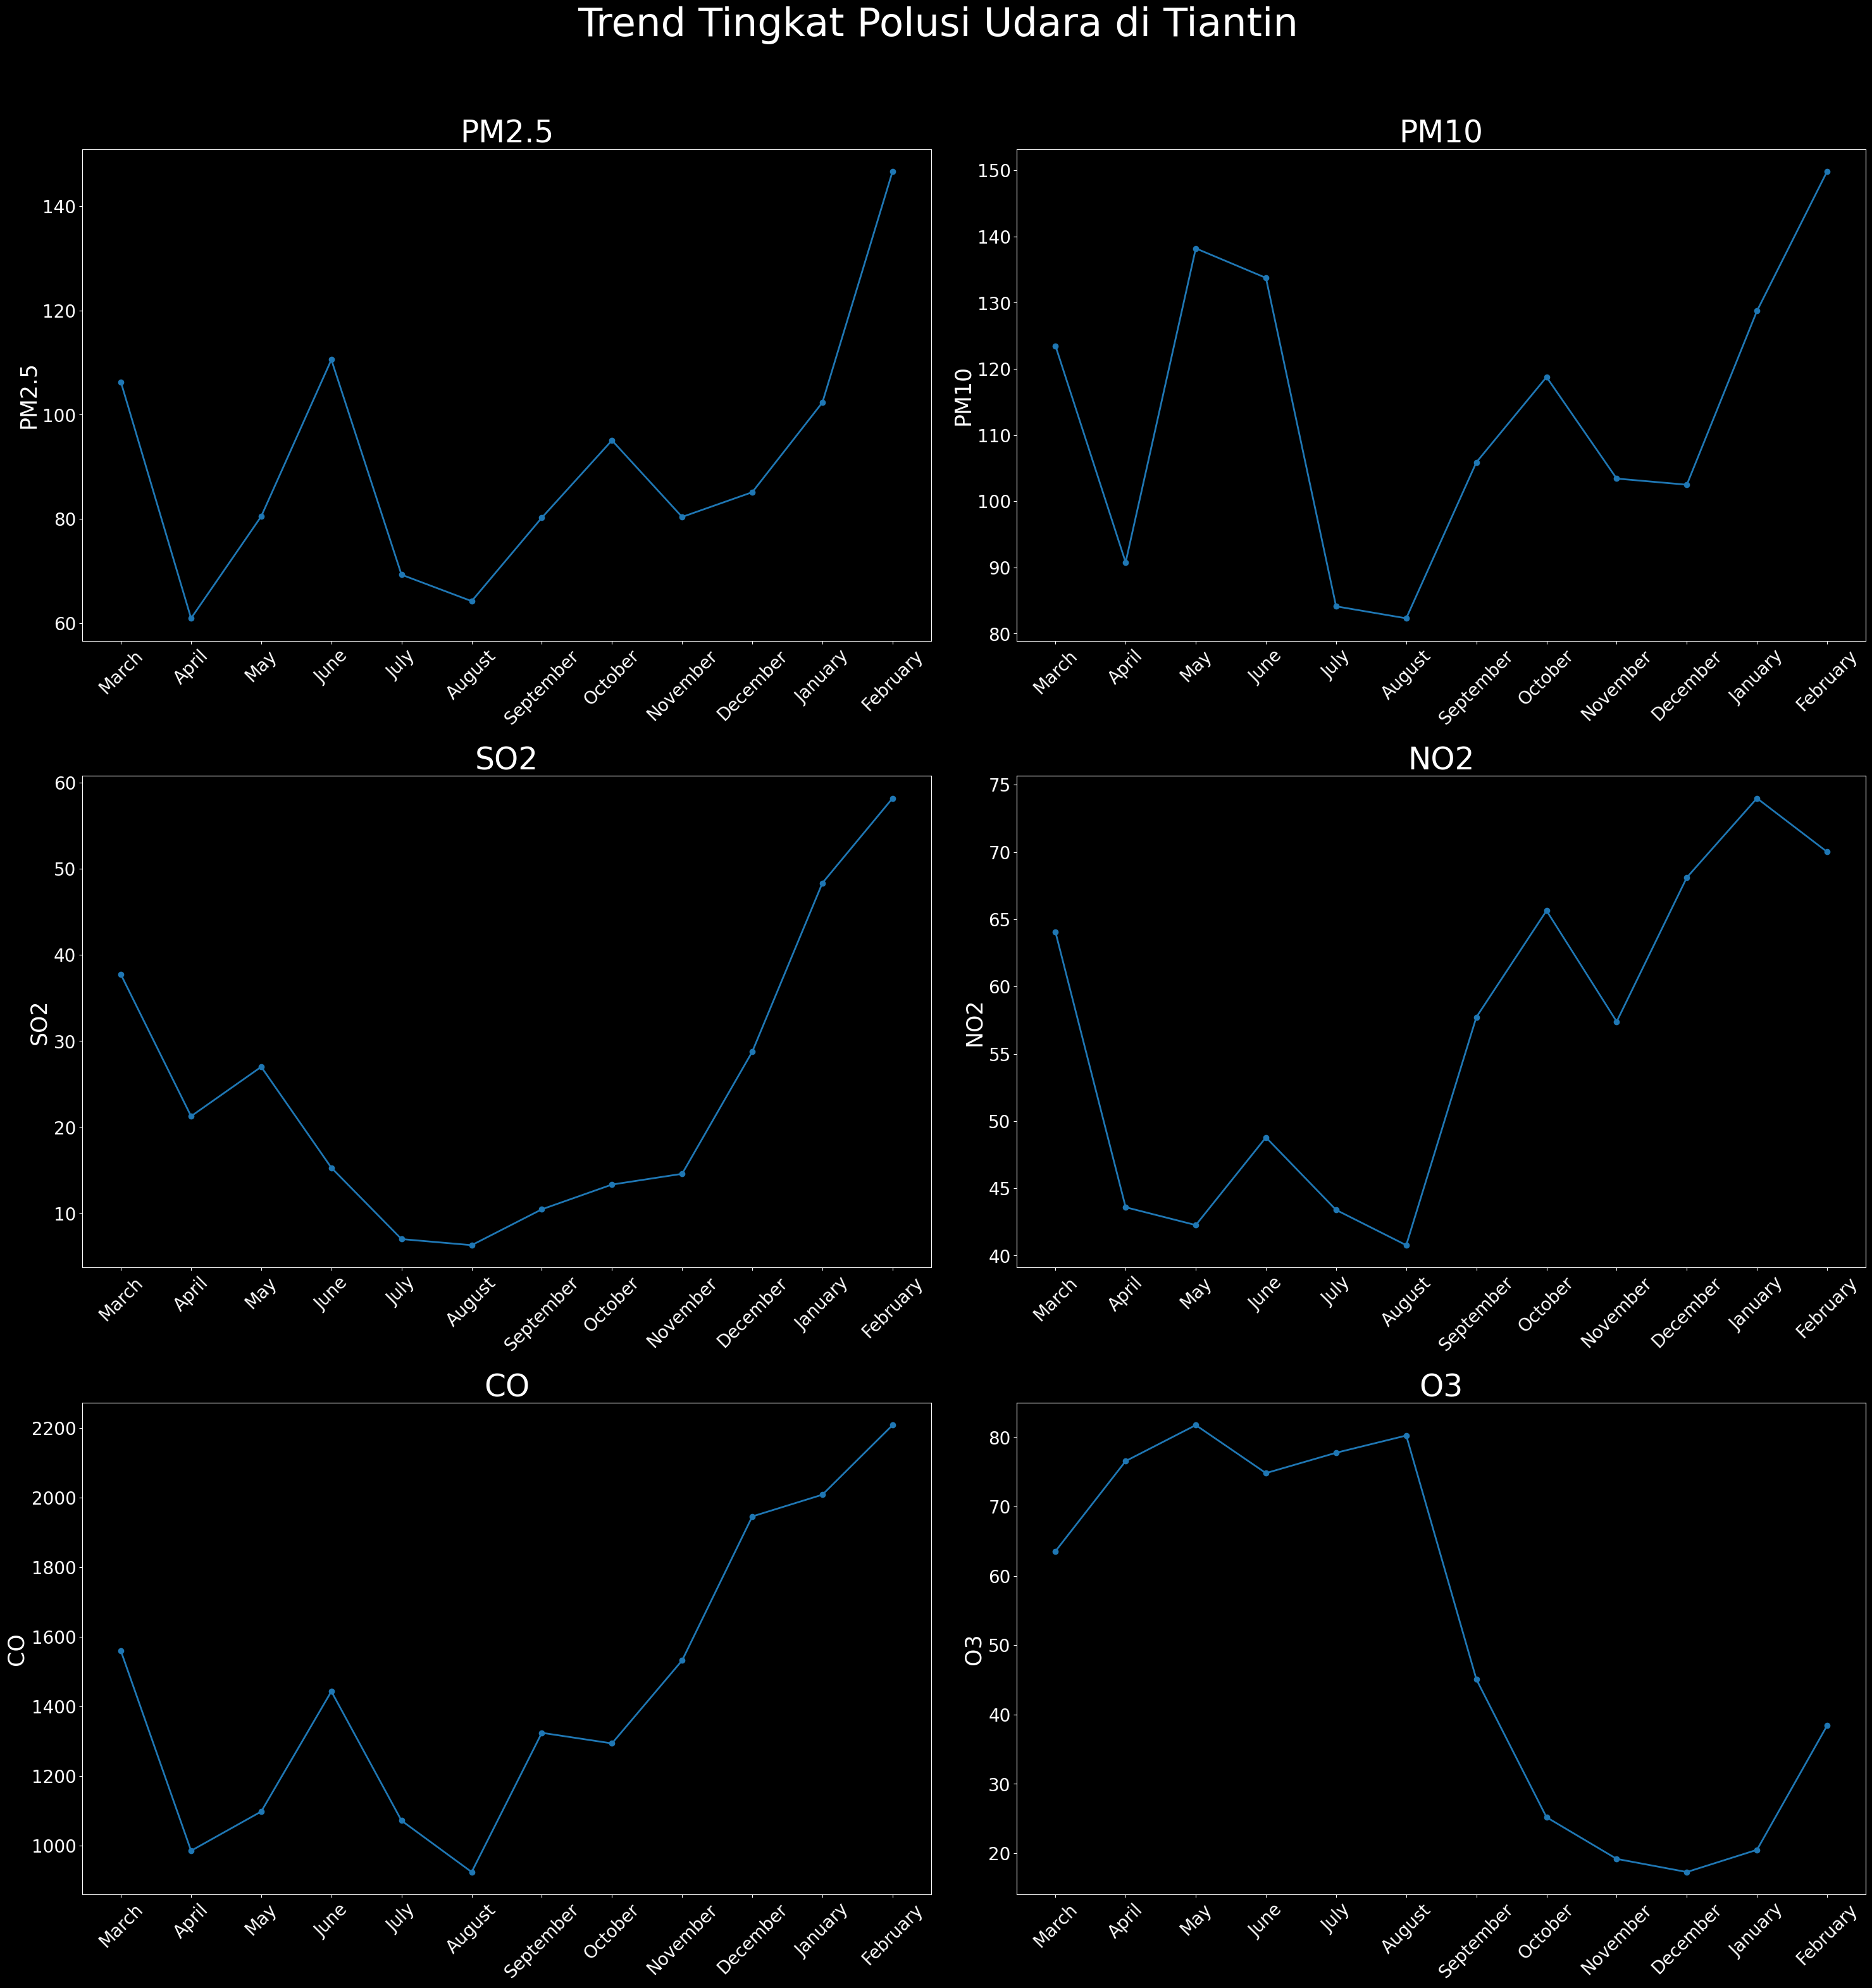

In [135]:
show_polution_line_chart(polution_groupby_month.head(12))

Visualisasi data berdasarkan tahun

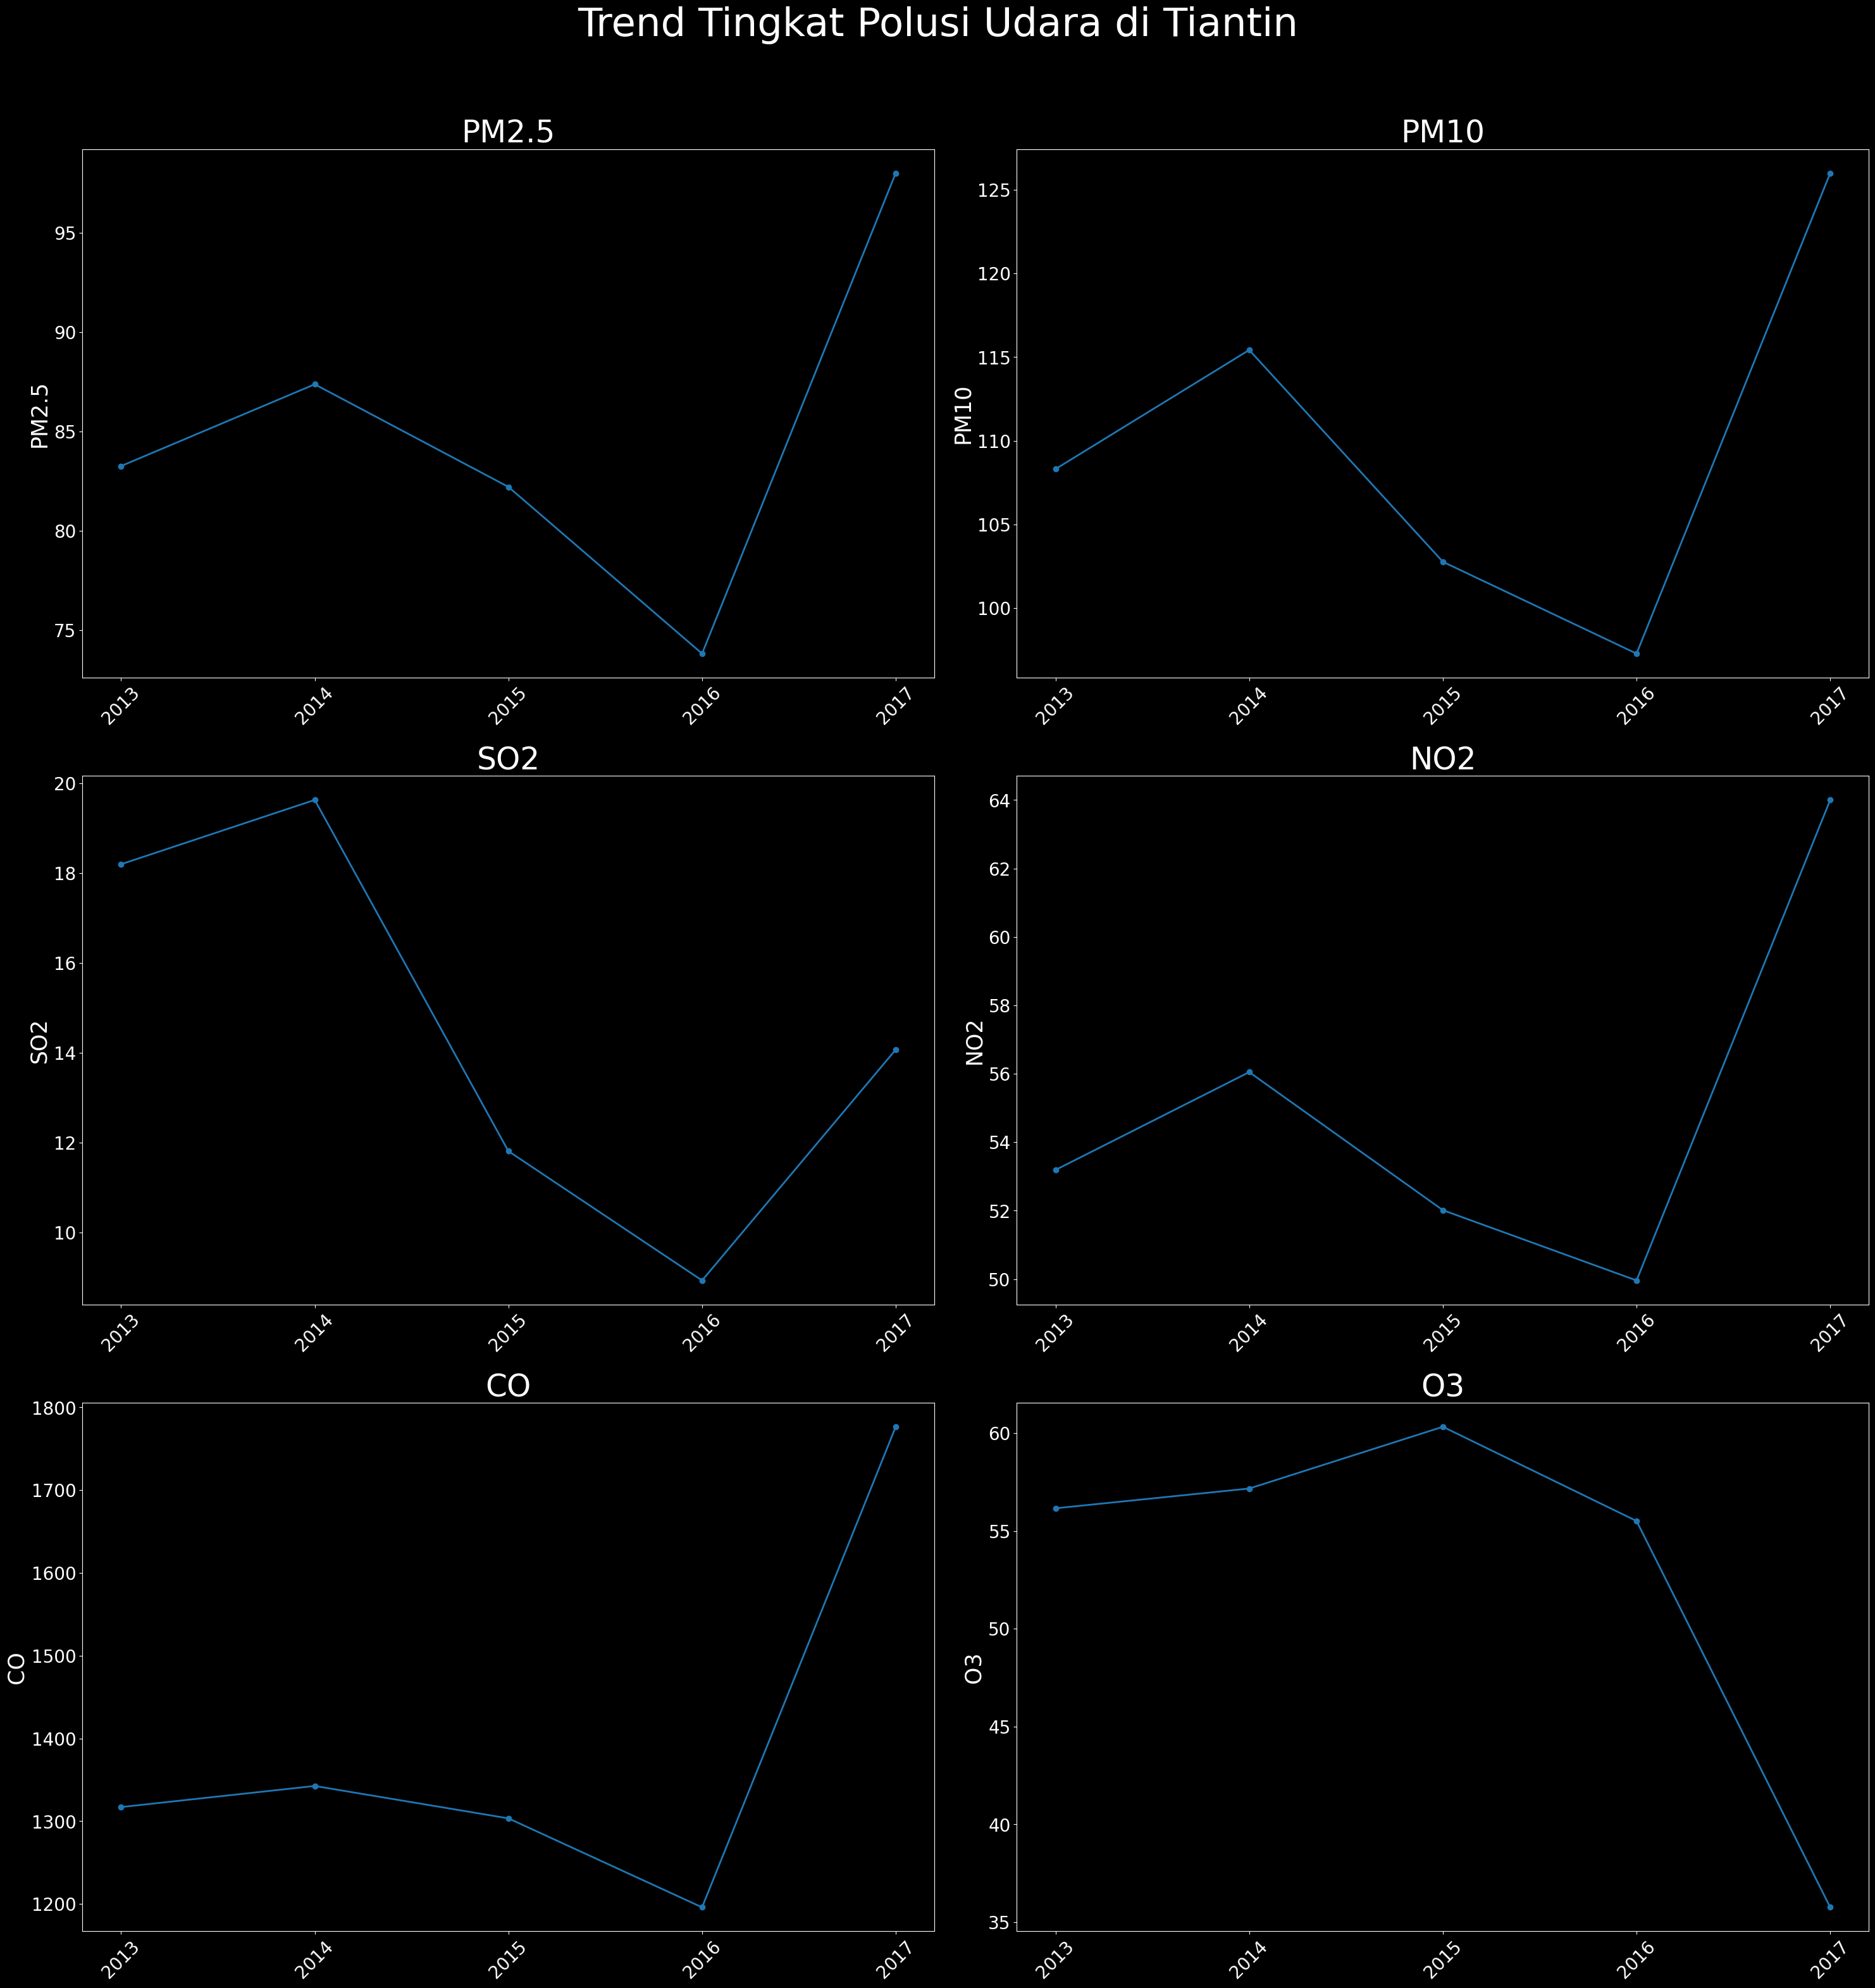

In [136]:
show_polution_line_chart(polution_groupby_year)

Rekap data Polusi

In [137]:
if round(tiantan_dataframe['PM2.5'].mean(), 2) >= 250.0:
  print(f'Rata rata PM2.5 : {round(tiantan_dataframe["PM2.5"].mean(), 2)} (BERBAHAYA)')
elif round(tiantan_dataframe['PM2.5'].mean(), 2) >= 150.4:
  print(f'Rata rata PM2.5 : {round(tiantan_dataframe["PM2.5"].mean(), 2)} (SANGAT TIDAK SEHAT)')
elif round(tiantan_dataframe['PM2.5'].mean(), 2) >= 55.4:
  print(f'Rata rata PM2.5 : {round(tiantan_dataframe["PM2.5"].mean(), 2)} (TIDAK SEHAT)')
elif round(tiantan_dataframe['PM2.5'].mean(), 2) >= 15.6:
  print(f'Rata rata PM2.5 : {round(tiantan_dataframe["PM2.5"].mean(), 2)} (SEDANG)')
else:
  print(f'Rata rata PM2.5 : {round(tiantan_dataframe["PM2.5"].mean(), 2)} (BAIK)')



if round(tiantan_dataframe['PM10'].mean(), 2) >= 421:
  print(f'Rata rata PM10 : {round(tiantan_dataframe["PM10"].mean(), 2)} (BERBAHAYA)')
elif round(tiantan_dataframe['PM10'].mean(), 2) >= 351:
  print(f'Rata rata PM10 : {round(tiantan_dataframe["PM10"].mean(), 2)} (SANGAT TIDAK SEHAT)')
elif round(tiantan_dataframe['PM10'].mean(), 2) >= 151:
  print(f'Rata rata PM10 : {round(tiantan_dataframe["PM10"].mean(), 2)} (TIDAK SEHAT)')
elif round(tiantan_dataframe['PM10'].mean(), 2) >= 51:
  print(f'Rata rata PM10 : {round(tiantan_dataframe["PM10"].mean(), 2)} (SEDANG)')
else:
  print(f'Rata rata PM10 : {round(tiantan_dataframe["PM10"].mean(), 2)} (BAIK)')

print(f'Rata rata SO2 : {round(tiantan_dataframe["SO2"].mean(), 2)}')
print(f'Rata rata NO2 : {round(tiantan_dataframe["NO2"].mean(), 2)}')
print(f'Rata rata CO : {round(tiantan_dataframe["CO"].mean(), 2)}')
print(f'Rata rata O3 : {round(tiantan_dataframe["O3"].mean(), 2)}')

Rata rata PM2.5 : 82.26 (TIDAK SEHAT)
Rata rata PM10 : 106.66 (SEDANG)
Rata rata SO2 : 14.48
Rata rata NO2 : 53.24
Rata rata CO : 1308.28
Rata rata O3 : 56.46


Mencari data Polusi Tertinggi

In [138]:
def show_highest_data(type):
  tiantan_dataframe['month'] = tiantan_dataframe['month'].astype(int)
  tiantan_dataframe['date'] = pd.to_datetime(tiantan_dataframe[['year', 'month', 'day', 'hour']])

  max_index = tiantan_dataframe[type].idxmax()

  max_pm25 = tiantan_dataframe[type].max()
  max_datetime = tiantan_dataframe.loc[max_index, 'date']

  formatted_date = max_datetime.strftime('%-d %B %Y')
  output = f'Data {type} tertinggi {max_pm25} [{formatted_date}]'

  return output

In [139]:
print(show_highest_data('PM2.5'))
print(show_highest_data('PM10'))
print(show_highest_data('SO2'))
print(show_highest_data('NO2'))
print(show_highest_data('CO'))
print(show_highest_data('O3'))

Data PM2.5 tertinggi 821.0 [8 February 2016]
Data PM10 tertinggi 988.0 [8 February 2016]
Data SO2 tertinggi 273.0 [27 October 2014]
Data NO2 tertinggi 241.0 [4 January 2017]
Data CO tertinggi 10000.0 [5 June 2015]
Data O3 tertinggi 674.0 [8 April 2013]


### Pertanyaan 2 : Pembagian data polusi berdasarkan Waktu

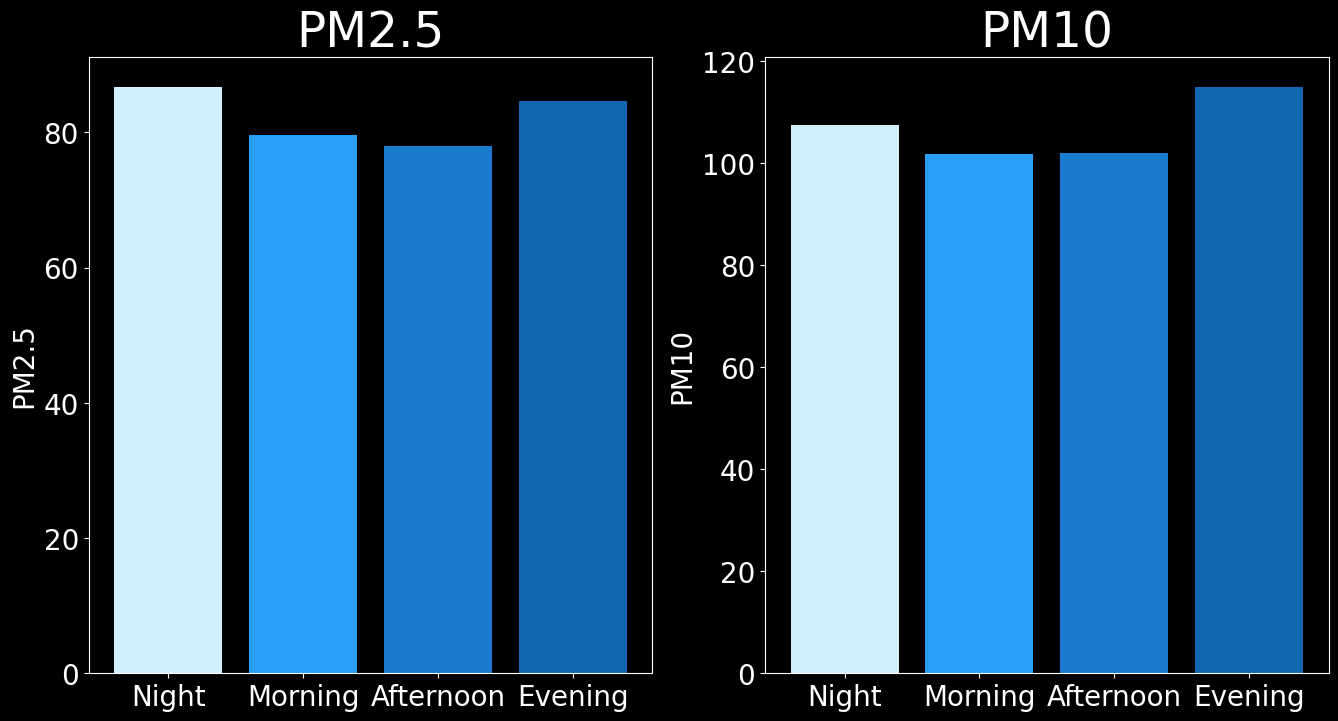

In [140]:
warna = ['#D0EFFF', '#2A9DF4','#187BCD','#1167B1']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].bar(x=time_category_group['time_category'], height=time_category_group['PM2.5'], color=warna)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].set_xlabel(None)
ax[0].set_ylabel("PM2.5", fontsize = 20)
ax[0].set_title("PM2.5", loc="center", fontsize=35)

ax[1].bar(x=time_category_group['time_category'], height=time_category_group['PM10'], color=warna)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].set_xlabel(None)
ax[1].set_ylabel("PM10", fontsize = 20)
ax[1].set_title("PM10", loc="center", fontsize=35)

plt.show()

### Pertanyaan 3 : Korelasi Polusi dengan Suhu dan Tekanan

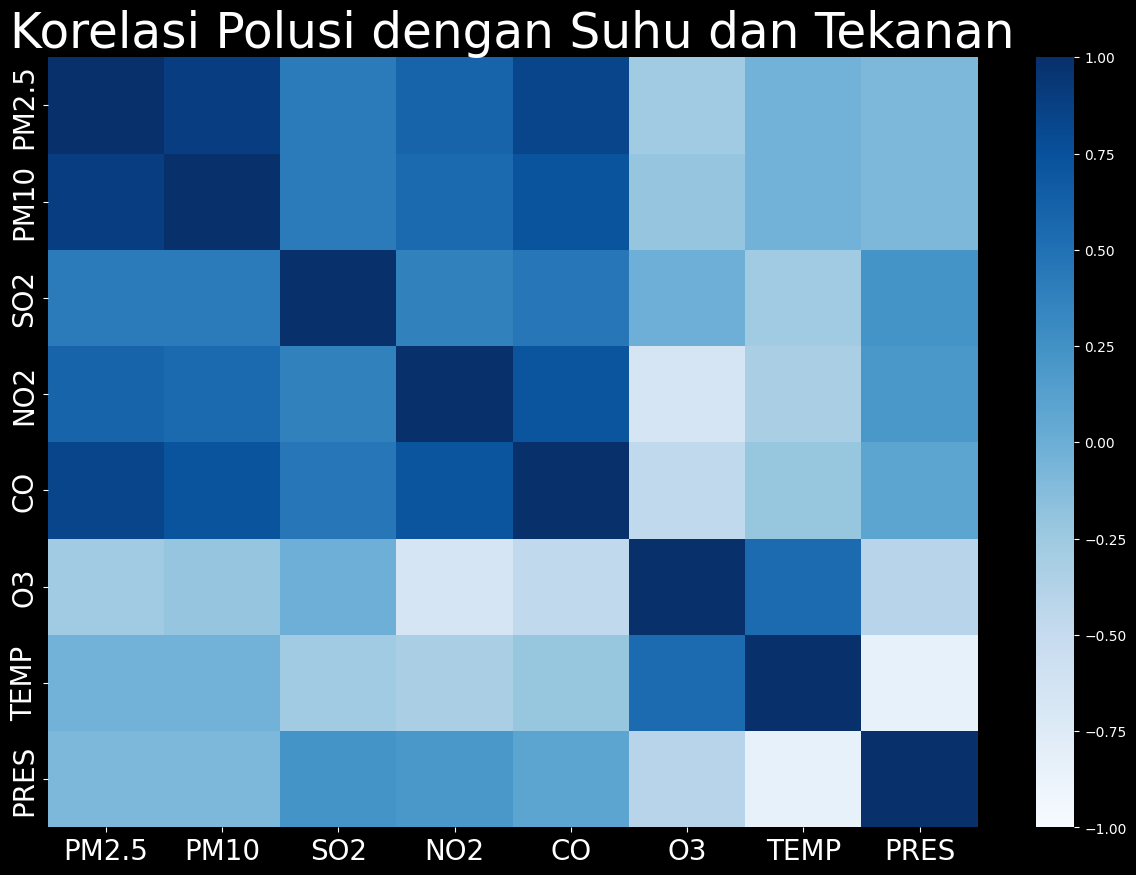

In [141]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, vmax=1, vmin=-1, center=0, cmap="Blues")
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_title("Korelasi Polusi dengan Suhu dan Tekanan", loc='center', fontsize=35)

plt.show()

# Conclusion

- Data Polusi di kota Tiantan menunjukkan kenaikan selama 5 tahun (2013 - 2017) dengan puncaknya pada tahun 2017. Rata rata PM2.5 selama 5 tahun tergolong TIDAK SEHAT dan rata PM10 selama 5 tahun tergolong SEDANG. Titik puncak polusi di kota Tiantan terekam pada 8 February 2016 dengan kadar PM2.5 adalah 821.0 dan kadar PM10 adalah 988.0.
- Partikel udara di kota Tiantan cenderung tinggi pada "Evening" (18-23) dan "Night" (0-6)
- Dari hasil visualisasi didapatkan data bahwa kadar partikel Polusi tidak memengaruhi Suhu dan Tekanan udara. Meskipun kadar O3 cukup berpengaruh, dengan tingkat pengaruh 0,55.